In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 9, 6
%load_ext autoreload
%autoreload 2

from keras.preprocessing.sequence import pad_sequences
from DeepHeart.deepheart.parser import PCG

np.random.seed(0)
pcg_raw = PCG('data/deepheart/', doFFT=False)
pcg_raw.initialize_wav_data()
X = pcg_raw.X
Y = pcg_raw.y
y = (Y[:, 0] == 1).astype('int')
n_min = min(len(x) for x in X)
n_max = max(len(x) for x in X)
X = pad_sequences(X, maxlen=n_max, value=-1.)

Using TensorFlow backend.


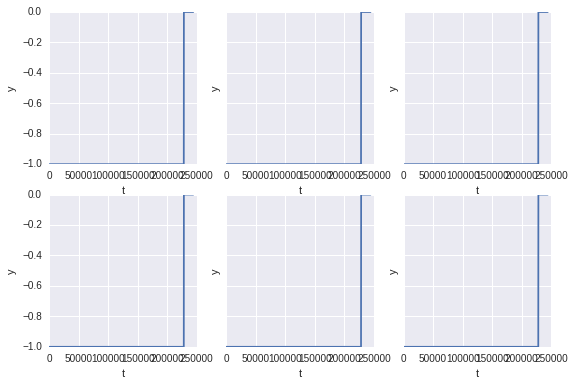

In [ ]:
fig, ax = plt.subplots(2, 3, sharey=True)
for j in range(3):
    i = np.where(y == 1)[0][0]
    ax[0][j].plot(X[i], '-')
    ax[0][j].set(xlabel="t", ylabel="y")
    i = np.where(y == 0)[0][0]
    ax[1][j].plot(X[i], '-')
    ax[1][j].set(xlabel="t", ylabel="y")

In [ ]:
from keras import backend as K
from keras.utils.np_utils import to_categorical

import keras_util as ku
from classification import even_gru_classifier as gru

K.set_session(ku.limited_memory_session(0.75, 0))
model_type = 'deepheart'
size = 64
num_layers = 3
drop_frac = 0.25
lr = 2e-3
model = gru(output_len=Y.shape[1], n_step=n_max, size=size, num_layers=num_layers, drop_frac=drop_frac)
run = "{}_{:03d}_x{}_{:1.0e}_drop{}".format(model_type, size, num_layers, lr, int(100 * drop_frac)).replace('e-', 'm')
history = ku.train_and_log(X[train], Y[train], run, model)